In [1]:
import sys
sys.path.append('../python')
import pandas as pd
from pylab import *
from tb_DataReader import EventFeaturesReader
from tb_PulseAmpFitter import PulseAmpFitter

%matplotlib inline
dataDir = "../data/eventFeatures"

Welcome to JupyROOT 6.16/00


In [2]:
#run,backend, channel="222","ubcm",2
run,backend, channel = "237","ubcm",0
rd = EventFeaturesReader(dataDir,"000"+run,backend)

# 1. Fit Data

In [6]:
ch = rd.getChannel(channel)
print ch
#print ch
title = "Run {}, sensor-{} {}V, {} CH{}, n={}".format(run,2, 300,backend,channel,len(ch))
# fitting
fitter = PulseAmpFitter(ch.pulseAmp)
#print ch.pulseAmp
#sigma = ch.baseline_std.mean()
fitter.fitRange(40,80,None)
# plot
#fitter.plot()
#plt.title(title, fontsize=14)
#plt.savefig("../plots/pulseAmpFit/langaus_{}_run{}_{}.png".format(backend,run,channel),dpi=300)

        event  ch   pulseAmp  pulsePos  baseline_mean  baseline_std  \
0          47   0   24.03840       298        126.962       2.17384   
1          53   0   32.01170       282        126.988       2.27095   
2          70   0   65.09350       291        126.907       2.17249   
3          73   0   76.17030       302        126.830       2.10909   
4          74   0   59.71620       279        127.284       2.03725   
5          96   0   80.42070       285        126.579       2.86820   
6         107   0   32.83970       301        127.160       2.00098   
7         118   0   24.41400       304        127.586       2.17631   
8         134   0    9.78631       284        127.214       1.95631   
9         149   0   18.56260       302        127.437       2.12936   
10        171   0   81.98330       289        127.017       2.37047   
11        181   0   39.72620       300        127.274       1.90907   
12        187   0   84.77630       305        127.224       2.18884   
13    

Text(0.5,1,'Run 237, sensor-2 300V, ubcm CH0, n=18760')

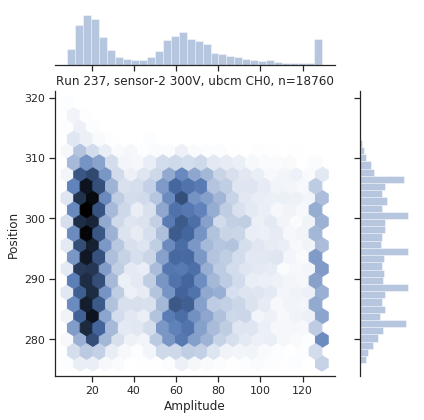

In [4]:
import seaborn as sns
sns.set(style="ticks")
jp= sns.jointplot(ch.pulseAmp, ch.pulsePos, kind="hex", color="C0",gridsize=20,ratio=4,space=0.5)
jp.set_axis_labels(r'Amplitude','Position')
#jp.ax_joint.plot([0,100])
jp.ax_joint.set_title(title)
#plt.savefig("../plots/PulseHist2D/{}_run{}_{}.png".format(backend,run,channel),dpi=300)